In [4]:
import pandas as pd

models = [
    "bert-large-uncased",
    "bert-base-uncased",
    "roberta-base",
    "roberta-large",
    "gpt2",
    "t5-base",
    "t5-small"
]

X = []

for m in models:
    csv_file = f'../data/adversarial-attacks/tf-{m}.csv'

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    num_success = (df['result_type'] == "Successful").sum()
    
    X.append((m, num_success))


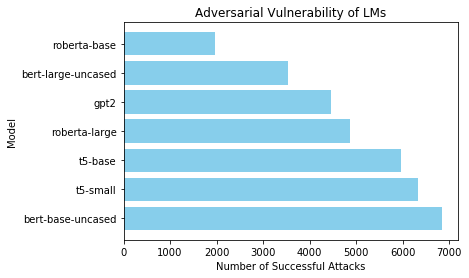

In [6]:
import matplotlib.pyplot as plt

# Sort the data in descending order
sorted_data = sorted(X, key=lambda x: x[1], reverse=True)
categories, values = zip(*sorted_data)

# Create a bar chart
plt.barh(categories, values, color='skyblue')

# Add labels and a title
plt.xlabel('Number of Successful Attacks')
plt.ylabel('Model')
plt.title('Adversarial Vulnerability of LMs')

# Show the plot
plt.show()


### correlate adversarial vulnerability with k0 vulnerability

In [8]:
from scipy.stats import spearmanr

adv_rank = [1, 2, 3, 4, 5, 6, 7]
k0_rank = [4, 2, 5, 1, 3, 7, 6]

# Calculate the Spearman rank correlation coefficient
correlation, p_value = spearmanr(adv_rank, k0_rank)

print("Spearman Rank Correlation:", correlation)

Spearman Rank Correlation: 0.5
